In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [10]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


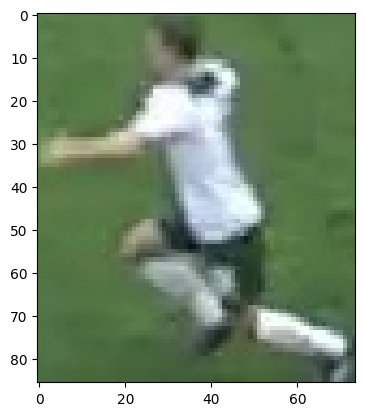

In [11]:
plt.imshow(image)
plt.show()

# Take the top half of the image

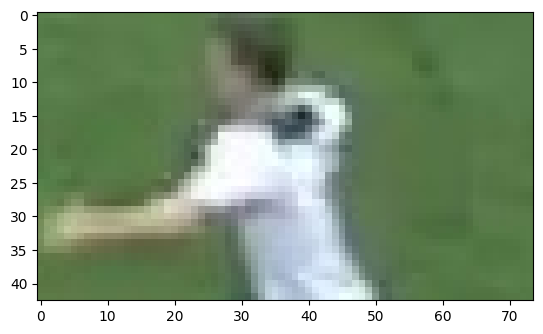

In [12]:
top_half_image = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half_image)

# Cluster the image into two clusters

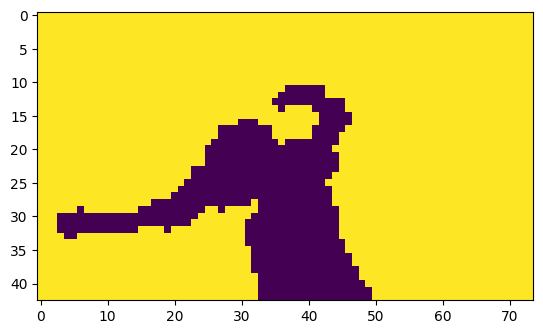

In [15]:
# Reshape the image to a 2D array of pixels and 3 color values (RGB)
image_2d = top_half_image.reshape((-1, 3))

# perform kmeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels to the original image dimension
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#Display the results
plt.imshow(clustered_image)
plt.show()

In [16]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print("Non player cluster: ", non_player_cluster)

Non player cluster:  1


In [17]:
player_cluster = 1 - non_player_cluster
print("Player cluster: ", player_cluster)

Player cluster:  0


In [18]:
kmeans.cluster_centers_[player_cluster]

array([198.69479354, 209.005386  , 211.68222621])